In [144]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import cross_val_score, KFold
%matplotlib inline

In [6]:
train_df = pd.read_csv('data/training_variants')
test_df = pd.read_csv('data/test_variants')

In [7]:
train_text_df = pd.read_csv("data/training_text", sep="\|\|", engine='python', header=None, skiprows=1,names=["id","text"])
test_text_df = pd.read_csv("data/test_text", sep="\|\|", engine='python', header=None, skiprows=1,names=["id","text"])

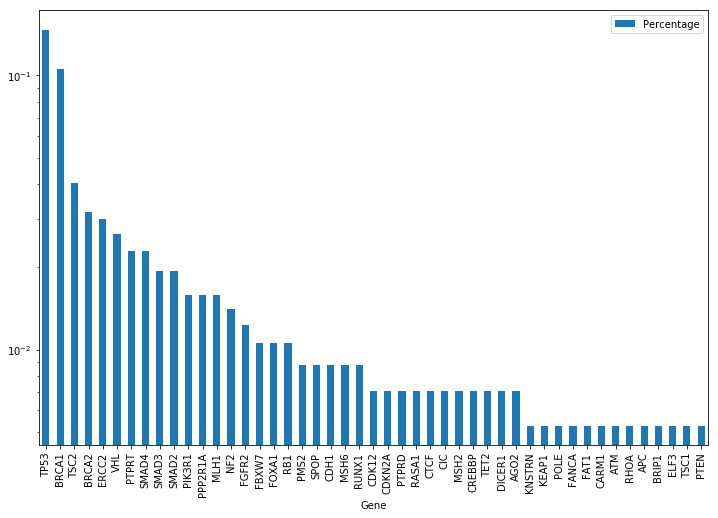

In [30]:
class1 = train_df.loc[train_df['Class'] == 1]
cnt_genes = class1.Gene.value_counts().reset_index()
cnt_genes.columns = ['Gene', 'Count']
total = cnt_genes.Count.sum()
cnt_genes['Percentage'] =(cnt_genes.Count/total)
cnt_genes.loc[cnt_genes['Count'] > 2].plot(x='Gene', y='Percentage', kind='bar', log='True',figsize=(12, 8))

In [31]:
class1

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
7,7,CBL,Deletion,1
16,16,CBL,Truncating Mutations,1
37,37,DICER1,D1709E,1
38,38,DICER1,D1709A,1
41,41,DICER1,Truncating Mutations,1
43,43,DICER1,Deletion,1
45,45,PTPRT,V648G,1
47,47,PTPRT,A707T,1
50,50,PTPRT,A209T,1


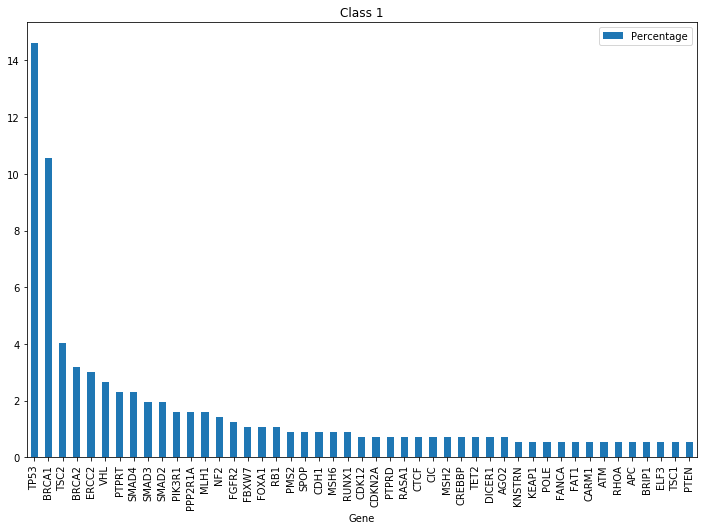

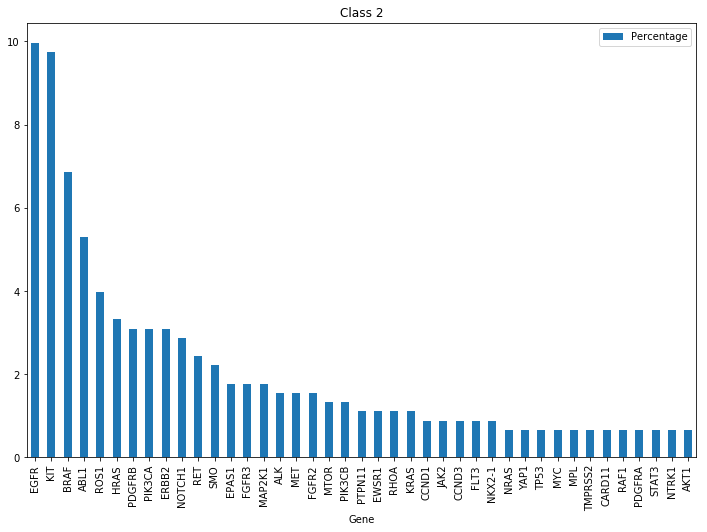

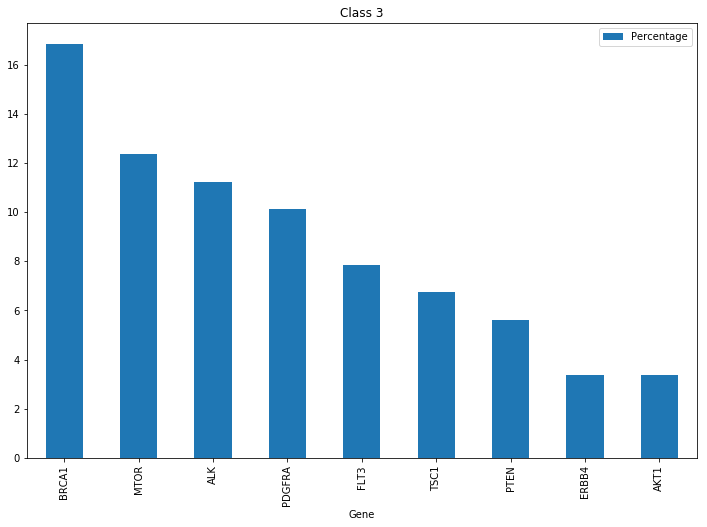

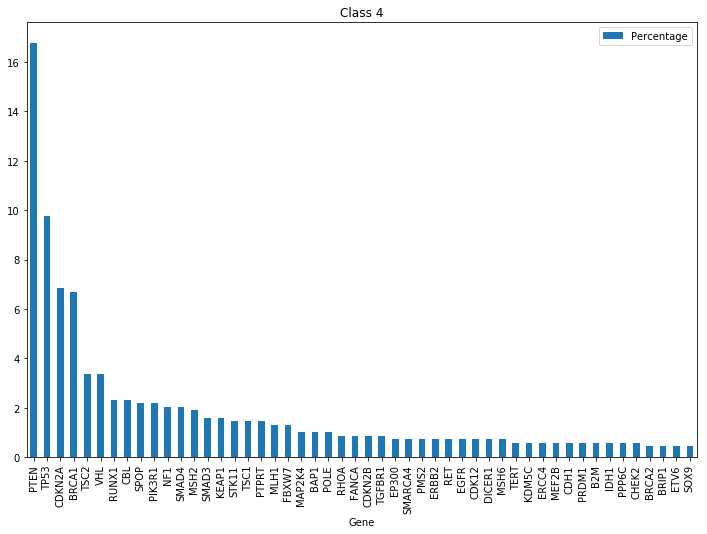

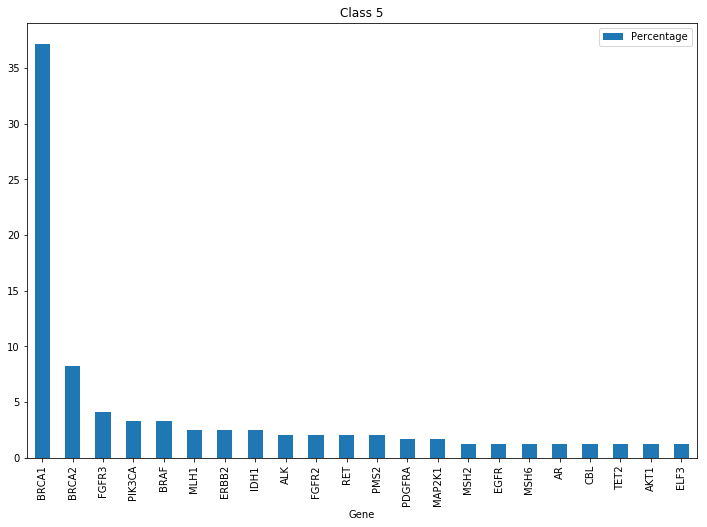

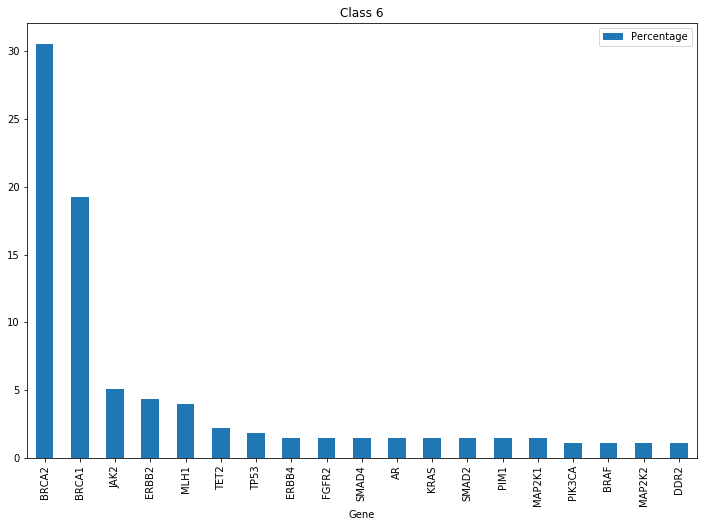

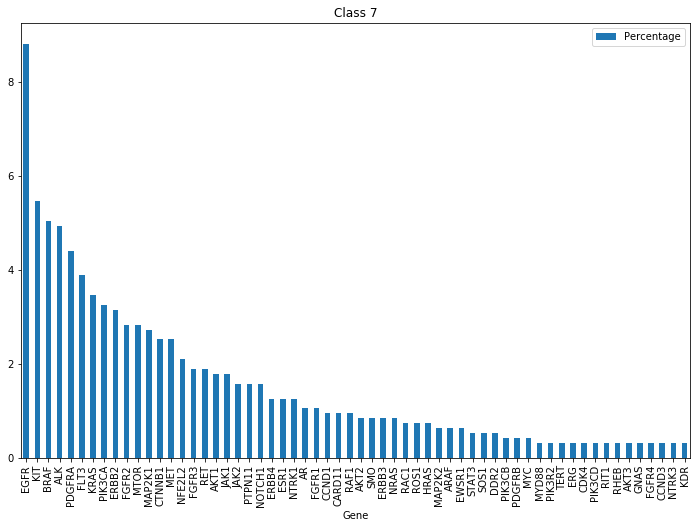

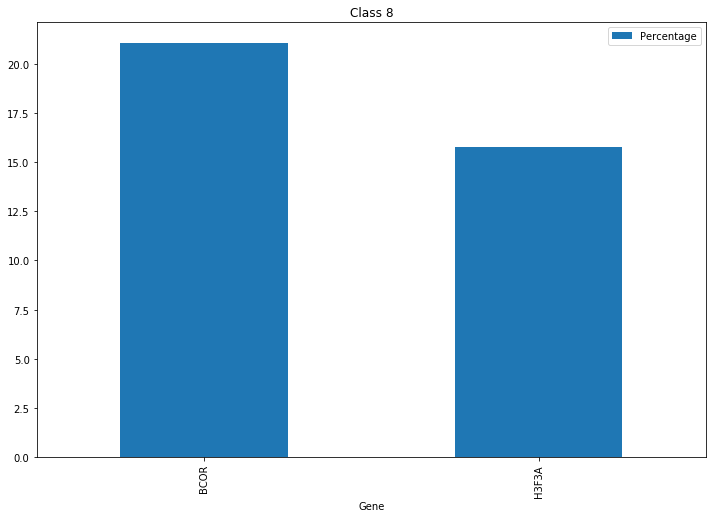

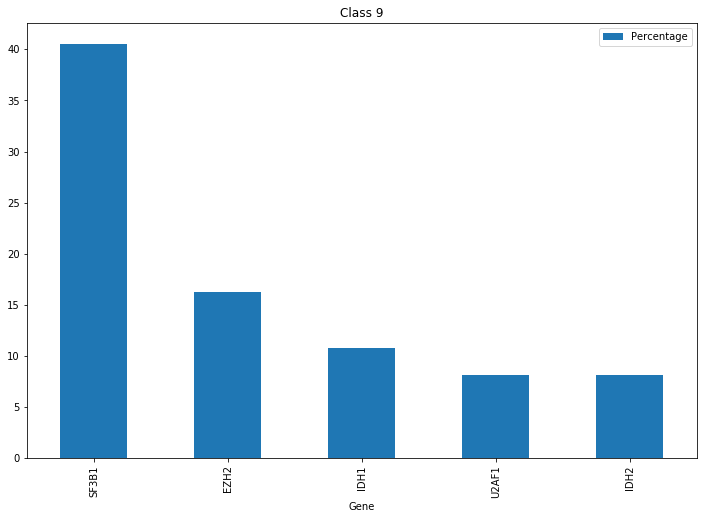

In [147]:
for i in range(1,10):
    class1 = train_df.loc[train_df['Class'] == i]
    cnt_genes = class1.Gene.value_counts().reset_index()
    cnt_genes.columns = ['Gene', 'Count']
    total = cnt_genes.Count.sum()
    cnt_genes['Percentage'] =(cnt_genes.Count/total)*100
    cnt_genes.loc[cnt_genes['Count'] > 2].plot(x='Gene', y='Percentage', kind='bar',title='Class '+str(i),figsize=(12, 8))

In [38]:
s = train_df.Gene.value_counts().reset_index()
s.columns=['Gene', 'Count']

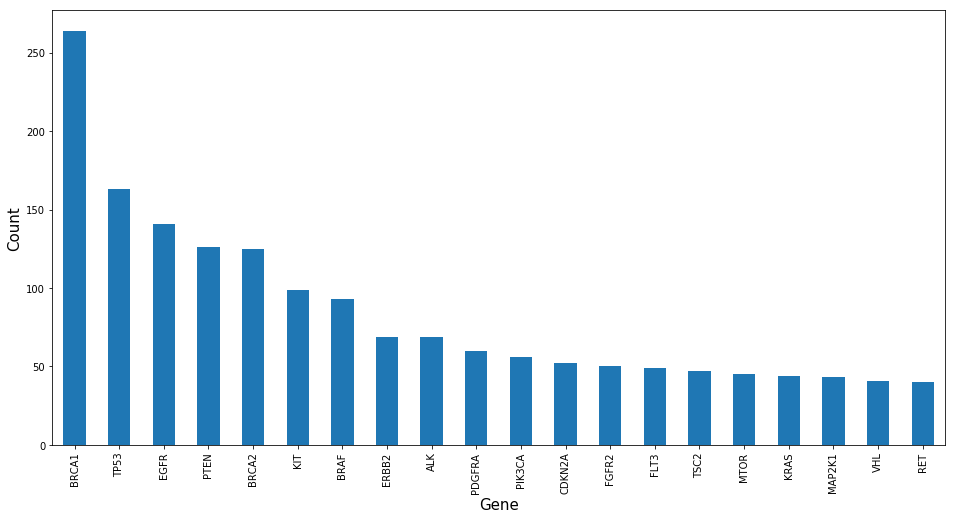

In [42]:
plt.figure(figsize=(16,8))
ax = train_df['Gene'].value_counts()[:20].plot.bar()
ax.set_xlabel("Gene",size=15)
ax.set_ylabel("Count",size=15)
plt.show()

Class 	 %
1 	 0.23
3 	 0.06
4 	 0.17
5 	 0.34
6 	 0.2


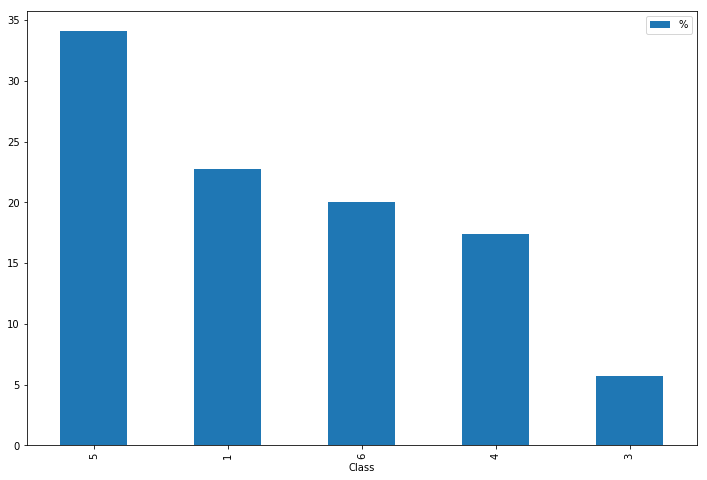

In [125]:
brca1 = train_df.loc[train_df['Gene']=='BRCA1']

val = brca1.groupby('Class')['Class'].count()
print('Class','\t','%')
for i in [1,3,4,5,6]:
    print(i,'\t',round(val[i]/val.sum(),2))
df1=brca1.Class.value_counts().reset_index()
df1.columns=['Class', 'Count']
total = df1.Count.sum()
df1['%'] = (df1.Count/total)*100
df1.plot(x='Class', y='%', kind='bar', figsize=(12, 8))

In [90]:
for x in train_df['Gene'].value_counts()[:20]:
    print(x)

264
163
141
126
125
99
93
69
69
60
56
52
50
49
47
45
44
43
41
40


In [124]:
train_df.groupby('Gene').Gene.value_counts().nlargest(10)

Gene    Gene  
BRCA1   BRCA1     264
TP53    TP53      163
EGFR    EGFR      141
PTEN    PTEN      126
BRCA2   BRCA2     125
KIT     KIT        99
BRAF    BRAF       93
ALK     ALK        69
ERBB2   ERBB2      69
PDGFRA  PDGFRA     60
Name: Gene, dtype: int64


-- BRCA1 --
Class 	 %
5 	 34.09 %
1 	 22.73 %
6 	 20.08 %
4 	 17.42 %
3 	 5.68 %

-- TP53 --
Class 	 %
1 	 50.92 %
4 	 41.1 %
6 	 3.07 %
2 	 1.84 %
5 	 1.23 %
3 	 1.23 %
9 	 0.61 %

-- EGFR --
Class 	 %
7 	 59.57 %
2 	 31.91 %
4 	 3.55 %
5 	 2.13 %
8 	 0.71 %
6 	 0.71 %
3 	 0.71 %
1 	 0.71 %

-- PTEN --
Class 	 %
4 	 91.27 %
3 	 3.97 %
1 	 2.38 %
5 	 1.59 %
7 	 0.79 %

-- BRCA2 --
Class 	 %
6 	 67.2 %
5 	 16.0 %
1 	 14.4 %
4 	 2.4 %

-- KIT --
Class 	 %
7 	 52.53 %
2 	 44.44 %
6 	 1.01 %
4 	 1.01 %
3 	 1.01 %


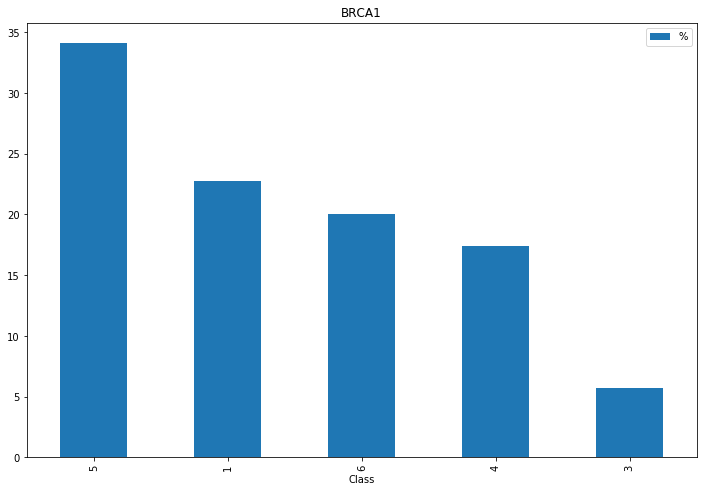

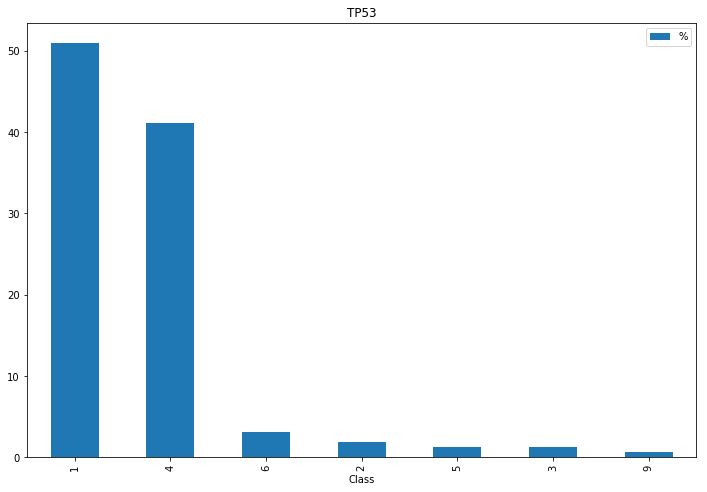

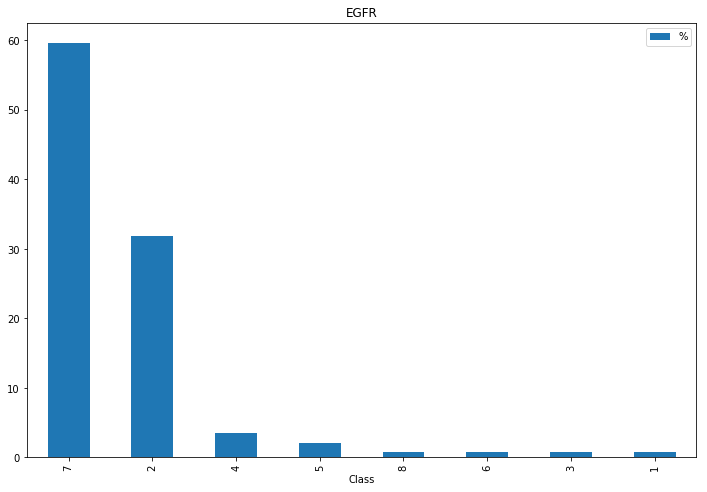

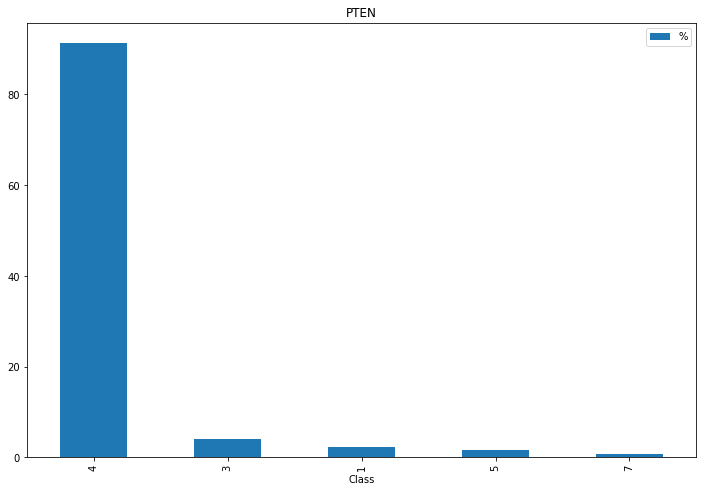

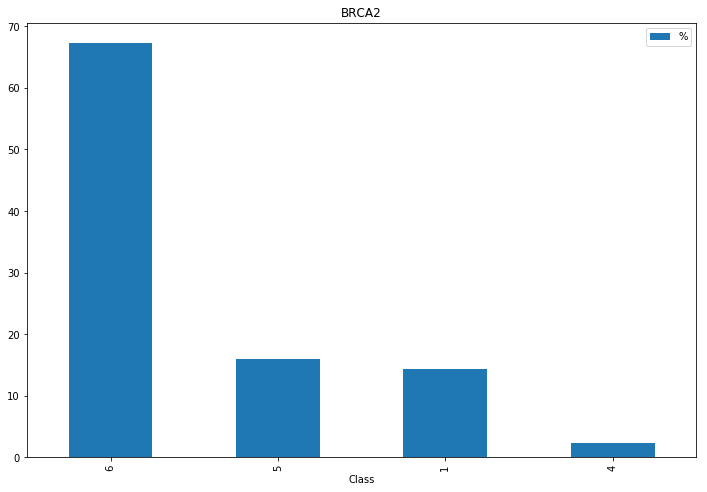

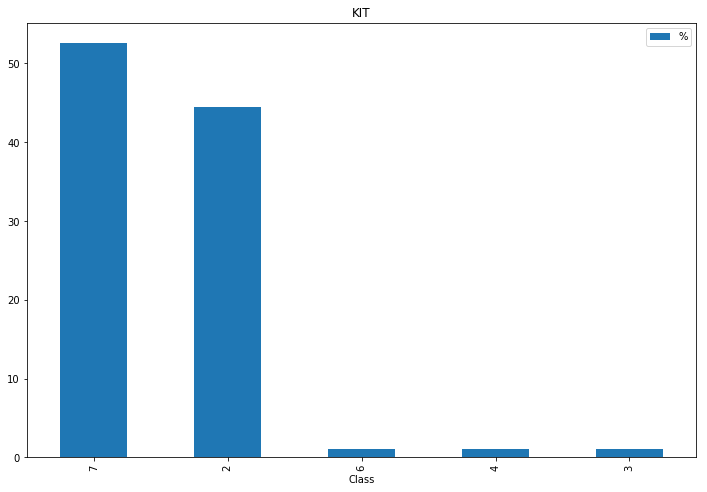

In [138]:
for i in ['BRCA1','TP53','EGFR','PTEN','BRCA2','KIT']:
    gene = train_df.loc[train_df['Gene']==i]
    print('\n--',i,'--')
    val = gene.groupby('Class')['Class'].count()
    print('Class','\t','%')
    df1=gene.Class.value_counts().reset_index()
    df1.columns=['Class', 'Count']
    total = df1.Count.sum()
    df1['%'] = (df1.Count/total)*100
    
    val = gene.Class.value_counts().reset_index()
    val.columns=['Class', 'Count']

    total = val.Count.sum()
    val['percentage'] = (val.Count/total)*100
    df1.plot(x='Class', y='%', kind='bar',title=i, figsize=(12, 8))
    for idx, c in val.iterrows():
        print(int(c.Class),'\t', round(c.percentage,2), '%')

Class 7 can be seen in EGFR among the majority

Build a classifier using the important features^.

TODO:
* Analysis for Variation
* Selection for Genes
* Figure out how to solve Imbalance